<IPython.core.display.Javascript object>


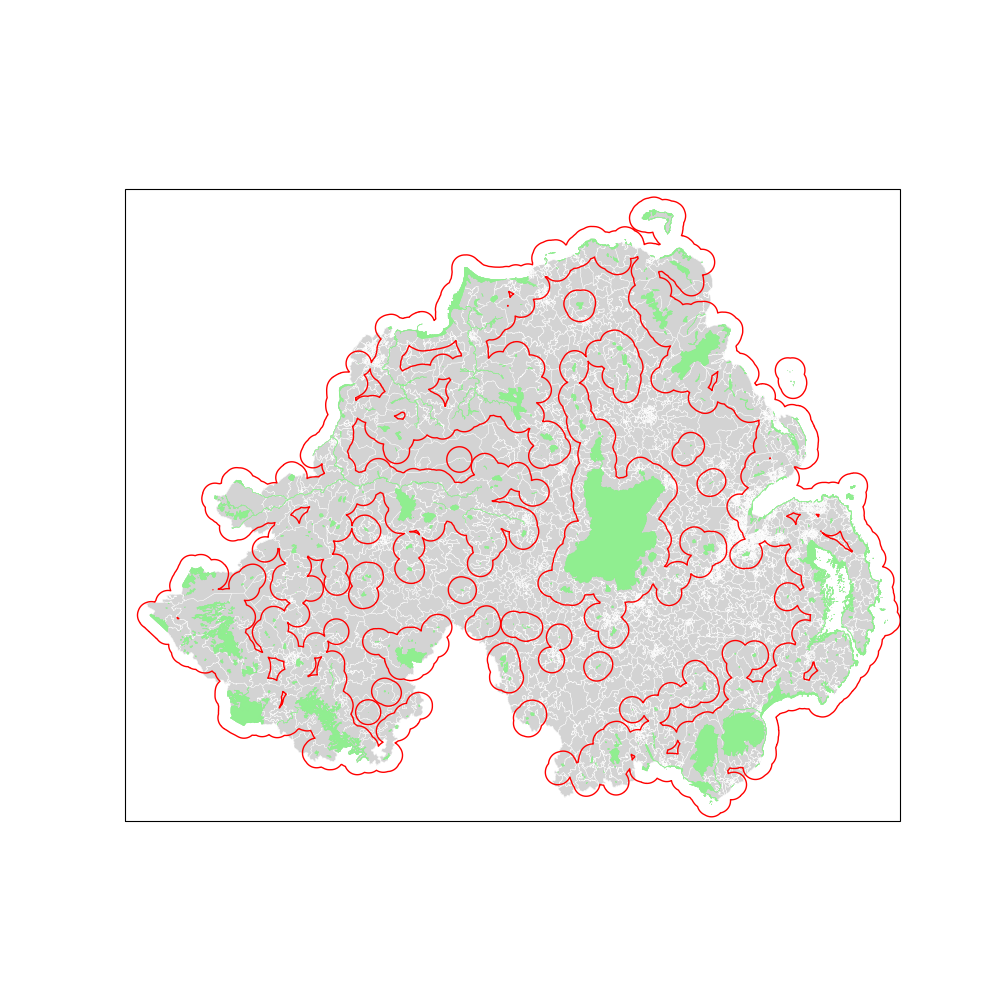

In [1]:
###- - - - - - - - - - - - - - -  Import required modules/packages/dependencies- - - - - - - - - - - - - - - - - - -  - - - - - - - - - -
from cartopy.feature import ShapelyFeature
import cartopy.crs as ccrs
import cartopy
import geopandas as gpd
import pandas as pd
from mpl_toolkits.axes_grid1 import make_axes_locatable
import os
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import folium
import ipywidgets
#from IPython.display import HTML, display
import numpy as np


#- - - - - - - - - - - - - - -  Initial Map SetUp- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -- - - ---------
%matplotlib notebook
# make the plotting interactive
#plt.ion()

# create the applicable CRS -in this case- Universal Transverse Mercator reference system- to transform the data
myCRS = ccrs.epsg(2157)

# create a figure of size 10x10 (representing the page size in inches)
myFig = plt.figure(figsize=(10, 10)) 

# create an axes object in the figure (within which the data shall be plotted), using the predefined crs
ax = plt.axes(projection=myCRS)  

# first, we just add the outline of Northern Ireland using cartopy's ShapelyFeature
outline= gpd.read_file(os.path.abspath('c:/Carol_PG_CERT_GIS/egm722_Practicals/egm722/week2/data_files/NI_outline.shp')).to_crs(epsg=2157)

outline_feature = ShapelyFeature(outline['geometry'], myCRS, edgecolor='w', facecolor='none', linewidth=1) #load in dataset, to be used to set the map extent
xmin, ymin, xmax, ymax = outline.total_bounds #then get this dataset bounds and set them against the axes extent '
ax.add_feature(outline_feature) # add the features we've created to the map.
ax.set_extent([xmin-5000, xmax+5000, ymin-5000, ymax+5000], crs=myCRS)
ASSI = gpd.read_file(os.path.abspath('c:/Carol_PG_CERT_GIS/EGM722_Project//data_files/ASSI.shp')).to_crs(epsg=2157)

myFig1 = myFig

###- - - - - - - - - - - - - - -  Add required data- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -- - - -
#add Agricultural fields
AgFields = gpd.read_file(os.path.abspath('c:/Carol_PG_CERT_GIS/EGM722_Project/data_files/AgFields.shp'))
AgFields.to_crs(epsg=2157, inplace=True)
# to add the  Agricultural fields data to map  :
AgFields_feature = ShapelyFeature(AgFields['geometry'], myCRS, edgecolor='w', facecolor='lightgrey', linewidth=0.3)
ax.add_feature(AgFields_feature)

# add ASSI
ASSI = gpd.read_file(os.path.abspath('c:/Carol_PG_CERT_GIS/EGM722_Project//data_files/ASSI.shp')).to_crs(epsg=2157)

ASSI = ASSI.drop(['MAP_SCALE', 'CONFIRMDAY', 'CONFIRM_HA', 'DECLAREDAY','DECLARE_HA','GIS_AREA', 'GIS_LENGTH', 'PARTIES', 'Shape_STAr', 'Shape_STLe'], axis=1)

# This function assigns aread in km2 and length in meters to any geodataframe
def assign_Area_Length(gdf):
    for ind, row in gdf.iterrows(): # iterate over each row in the GeoDataFrame
        ASSI.loc[ind, 'Area_km2'] = row['geometry'].area / 1000000 # assign the row's geometry length to a new column, Area
    
    for ind, row in gdf.iterrows(): # iterate over each row in the GeoDataFrame
        ASSI.loc[ind, 'Length_m'] = row['geometry'].length  # assign the row's geometry length to a new column, Length

    
assign_Area_Length(ASSI)    
 
neworder = ['geometry','OBJECTID', 'REFERENCE',  'NAME', 'COUNTY', 'SPECIESPT1', 'SPECIESPT2', 'HABITAT', 'EARTH_SCI', 'Areakm2', 'Length_m','Hyperlink']
ASSI= ASSI.reindex(columns=neworder)

ASSI_feature = ShapelyFeature(ASSI['geometry'], myCRS, edgecolor='lightgreen', facecolor='lightgreen', linewidth=0.1)
ax.add_feature(ASSI_feature)

###- - - - - - - - - - - - - - -  Add required data- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -- - - -
#add Agricultural fields
AgFields = gpd.read_file(os.path.abspath('c:/Carol_PG_CERT_GIS/EGM722_Project/data_files/AgFields.shp'))
AgFields.to_crs(epsg=2157, inplace=True)
# to add the  Agricultural fields data to map  :
AgFields_feature = ShapelyFeature(AgFields['geometry'], myCRS, edgecolor='w', facecolor='lightgrey', linewidth=0.3)
ax.add_feature(AgFields_feature)

# add ASSI
ASSI = gpd.read_file(os.path.abspath('c:/Carol_PG_CERT_GIS/EGM722_Project//data_files/ASSI.shp')).to_crs(epsg=2157)

ASSI = ASSI.drop(['MAP_SCALE', 'CONFIRMDAY', 'CONFIRM_HA', 'DECLAREDAY','DECLARE_HA','GIS_AREA', 'GIS_LENGTH', 'PARTIES', 'Shape_STAr', 'Shape_STLe'], axis=1)

# This function assigns aread in km2 and length in meters to any geodataframe
def assign_Area_Length(gdf):
    for ind, row in gdf.iterrows(): # iterate over each row in the GeoDataFrame
        ASSI.loc[ind, 'Area_km2'] = row['geometry'].area / 1000000 # assign the row's geometry length to a new column, Area
    
    for ind, row in gdf.iterrows(): # iterate over each row in the GeoDataFrame
        ASSI.loc[ind, 'Length_m'] = row['geometry'].length  # assign the row's geometry length to a new column, Length

    
assign_Area_Length(ASSI)    
 
neworder = ['geometry','OBJECTID', 'REFERENCE',  'NAME', 'COUNTY', 'SPECIESPT1', 'SPECIESPT2', 'HABITAT', 'EARTH_SCI', 'Areakm2', 'Length_m','Hyperlink']
ASSI= ASSI.reindex(columns=neworder)

ASSI_feature = ShapelyFeature(ASSI['geometry'], myCRS, edgecolor='lightgreen', facecolor='lightgreen', linewidth=0.1)
ax.add_feature(ASSI_feature)

###- - - - - - - - - - - - - - -  Add required data- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -- - - -
#add Agricultural fields
AgFields = gpd.read_file(os.path.abspath('c:/Carol_PG_CERT_GIS/EGM722_Project/data_files/AgFields.shp'))
AgFields.to_crs(epsg=2157, inplace=True)
# to add the  Agricultural fields data to map  :
AgFields_feature = ShapelyFeature(AgFields['geometry'], myCRS, edgecolor='w', facecolor='lightgrey', linewidth=0.3)
ax.add_feature(AgFields_feature)

# add ASSI
ASSI = gpd.read_file(os.path.abspath('c:/Carol_PG_CERT_GIS/EGM722_Project//data_files/ASSI.shp')).to_crs(epsg=2157)

ASSI = ASSI.drop(['MAP_SCALE', 'CONFIRMDAY', 'CONFIRM_HA', 'DECLAREDAY','DECLARE_HA','GIS_AREA', 'GIS_LENGTH', 'PARTIES', 'Shape_STAr', 'Shape_STLe'], axis=1)

# This function assigns aread in km2 and length in meters to any geodataframe
def assign_Area_Length(gdf):
    for ind, row in gdf.iterrows(): # iterate over each row in the GeoDataFrame
        ASSI.loc[ind, 'Area_km2'] = row['geometry'].area / 1000000 # assign the row's geometry length to a new column, Area
    
    for ind, row in gdf.iterrows(): # iterate over each row in the GeoDataFrame
        ASSI.loc[ind, 'Length_m'] = row['geometry'].length  # assign the row's geometry length to a new column, Length

    
assign_Area_Length(ASSI)    
 
neworder = ['geometry','OBJECTID', 'REFERENCE',  'NAME', 'COUNTY', 'SPECIESPT1', 'SPECIESPT2', 'HABITAT', 'EARTH_SCI', 'Areakm2', 'Length_m','Hyperlink']
ASSI= ASSI.reindex(columns=neworder)

ASSI_feature = ShapelyFeature(ASSI['geometry'], myCRS, edgecolor='lightgreen', facecolor='lightgreen', linewidth=0.1)
 
# to add the  ASSI data to map:
ax.add_feature(ASSI_feature)


In [3]:
###- - - - - - - - - - - - - - -  Initial spatial analysis- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -- - - -
AgFields.crs == ASSI.crs  #Ensure all in gdfs are in same CRS

ASSI_3km_buffer = ASSI.copy()
ASSI_3km_buffer.geometry = ASSI.geometry.buffer(3000)
ASSI_3km_buffer_dis = ASSI_initial_buffer.dissolve()
ASSI_initial_buffer_dis_feature = ShapelyFeature(ASSI_3km_buffer_dis['geometry'], myCRS, edgecolor='red', facecolor='none', linewidth=1)

#ax.add_feature(ASSI_initial_buffer_feature)
ax.add_feature(ASSI_initial_buffer_dis_feature)

In [ ]:
#ax.add_feature(ASSI_initial_buffer_feature)
#ax.add_feature(ASSI_initial_buffer_dis_feature)

In [ ]:
# to restrict the 3m buffer to the Agricultural Fields extent
ASSI_second_Buf = gpd.overlay(ASSI_initial_buffer_dis, AgFields, how ='intersection')
ASSI_3km_Buf = ASSI_second_Buf.dissolve() 
ASSI_3km_Buf_feature = ShapelyFeature(ASSI_3km_Buf['geometry'], myCRS, edgecolor='red', facecolor='none', linewidth=1)

#ax.add_feature(ASSI_bufDisfeature)
#ax.add_feature(ASSI_3k_Buf_feature)

# to add the  ASSI data to map:
ax.add_feature(ASSI_feature)

# to add the  ASSI buffer data to map:
ax.add_feature(ASSI_3km_Buf_feature)



#ax.add_feature(ASSI_bufDisfeature)
#ax.add_feature(ASSI_3k_Buf_feature)
# to add the  ASSI data to map:
#ax.add_feature(ASSI_feature)

In [ ]:
ax.add_feature(ASSI_feature)
ASSI.loc[ASSI['NAME'] == 'Lough Neagh']

In [ ]:
ASSI_initial_buffer_dis_feature = ShapelyFeature(ASSI_initial_buffer_dis['geometry'], myCRS, edgecolor='purple', facecolor='none', linewidth=1)

#ax.add_feature(ASSI_initial_buffer_feature)
ax.add_feature(ASSI_initial_buffer_dis_feature)

In [ ]:
intersectLayer = gpd.overlay(AgFields, ASSI_buffer, how ='intersection')
intersectLayer2= intersectLayer['geometry'].unary_union 
#ASSI_buffer.head()
#ASSI_buffer.head()
print(type(intersectLayer))
intersectLayer_feature = ShapelyFeature(intersectLayer2['geometry'], myCRS, edgecolor='green', facecolor='none', linewidth=2)
ax.add_feature(intersectLayer_feature)

In [ ]:
intersectLayer2= intersectLayer['geometry'].unary_union 
#ASSI_buffer.head()
#ASSI_buffer.head()
print(type(intersectLayer))
intersectLayer_feature = ShapelyFeature(intersectLayer2['geometry'], myCRS, edgecolor='green', facecolor='none', linewidth=2)
ax.add_feature(intersectLayer_feature)

In [ ]:
ASSI_buffer.to_file('ASSIbuf3km.shp')
#print(outline.area)
#print(ASSI_buffer.area)
print(ASSI_buffer.geometry.area.sum)
#print(ASSI_buffer.columns)
#print(ASSI_buffer.area.sum)

In [ ]:
#- - - - - - - - - - - - - - -  Initial summary results- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

In [ ]:
ASSI.head()

In [ ]:
print(ASSI_buffer.columns)
ASSI_buffer.head()

In [ ]:
ASSI_buffer.head()
ASSI_buffer.loc[ASSI_buffer['NAME'] == 'Lough Neagh']
columnsToDelete = ['GIS_AREA', 'GIS_LENGTH', 'Shape_STAr', 'Shape_STLe'] # columns to be removed
ASSI_buffer = ASSI_buffer.drop(columns= columnsToDelete) # remove columns

In [ ]:
ASSI_buffer.to_file('filename.shp', driver = "ESRI Shapefile") #saves file to an esri shapefile


In [ ]:
#to get the top 10 values of a field:
top_10 = ASSI.sort_values("GIS_AREA", ascending=False).head(10)
top_10


In [ ]:
print(type(top_10))
top_10feature = ShapelyFeature(top_10['geometry'], myCRS, edgecolor='yellow', facecolor='none', linewidth=2)
ax.add_feature(top_10feature)
myFig

In [ ]:
#- - - - - - - - - - - - - - -  Further spatial analyses- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

join = gpd.sjoin(ASSI_buffer, AgFields, how='inner', lsuffix='left', rsuffix='right')
join = gpd.sjoin(counties, wards, how='inner', lsuffix='left', rsuffix='right') # perform the spatial join of counties and wards
joinedData = join.groupby(['CountyName'])['Population'].sum() # assign summary data to variable to be printed
print(joinedData)
# below here, you may need to modify the script somewhat to create your map.






# to make a nice colorbar that stays in line with our map, use these lines:
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1, axes_class=plt.Axes)


# plot the ward data into our axis, using
ward_plot = wards.plot(column='Population', ax=ax, vmin=1000, vmax=8000, cmap='viridis',
                       legend=True, cax=cax, legend_kwds={'label': 'Resident Population'})


county_outlines = ShapelyFeature(counties['geometry'], myCRS, edgecolor='r', facecolor='none')


ax.add_feature(county_outlines)
county_handles = [mpatches.Rectangle((0, 0), 1, 1, facecolor='none', edgecolor='r')]

ax.legend(county_handles, ['County Boundaries'], fontsize=12, loc='upper left', framealpha=1)




In [ ]:
ax.add_feature(intersectLayer_feature)

In [ ]:
#- - - - - - - - - - - - - - -  Further summary results- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

In [ ]:
###- - - - - - - - - - - - - - -  Add background features to map (for aesthetic/contest setting purposes only) - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -- - - -
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.LAND)
#ax.add_feature(cartopy.feature.BORDERS)

#add towns  to give additional context
towns = gpd.read_file(os.path.abspath('c:/Carol_PG_CERT_GIS/egm722_Practicals/egm722/week2/data_files/Towns.shp'))
towns.to_crs(epsg=2157, inplace=True)
# to add the town point data to map and create town handle:
town_handle = ax.plot(towns.geometry.x, towns.geometry.y, 's', color='0.5', ms=6, transform=myCRS)
# add the text labels for the towns
for ind, row in towns.iterrows():  # towns.iterrows() returns the index and row
    x, y = row.geometry.x, row.geometry.y  # get the x,y location for each town
    ax.text(x, y, row['TOWN_NAME'].title(), fontsize=8, transform=myCRS)  # use plt.text to place a label at x,y
    
    


In [ ]:
# generate matplotlib handles to create a legend of features in output map
def generate_handles(labels, colors, edge='w', alpha=1):
    lc = len(colors)  # get the length of the color list
    handles = []
    for i in range(len(labels)):
        handles.append(mpatches.Rectangle((0, 0), 1, 1, facecolor=colors[i % lc], edgecolor=edge, alpha=alpha))
    return handles


# generate a list of handles for the ASSI datasets
ASSI_handles = generate_handles(['COUNTY'], ['lightgreen'])
#ASSI_buffer_handles = generate_handles(['COUNTY'], ['lightgreen'])
ASSI_buffer_handles = [mpatches.Rectangle((0, 0), 1, 1, facecolor='none', edgecolor='r')]
AgField_handles = [mpatches.Rectangle((0, 0), 1, 1, facecolor='lightgrey', edgecolor='w')]

In [ ]:
#- - - - - - - - - - - - - - -  Present results from analysis- - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
#TODO: present results

In [ ]:
###- - - - - - - - - - - - - - - Output the final map- - - - - - - - - - - - - - -
# generate a list of handles for the ASSI datasets
ASSI_handles = [mpatches.Rectangle((0, 0), 1, 1, facecolor='lightgreen', edgecolor='lightgreen')]
ASSI_buffer_handles = [mpatches.Rectangle((0, 0), 1, 1, facecolor='none', edgecolor='r')]
AgField_handles = [mpatches.Rectangle((0, 0), 1, 1, facecolor='lightgrey', edgecolor='w')]

handles =  town_handle +  AgField_handles + ASSI_handles + ASSI_buffer_handles 
labels = ['Town', 'Field','ASSI', '3km Buffer']

leg = ax.legend(handles, labels, title='Legend', title_fontsize=12,
                fontsize=10, loc='upper left', frameon=True, framealpha=1)


#-----------------------------add gridlines:----------------------------------------------------------------------------------
gridlines = ax.gridlines(draw_labels=True,  # draw  labels for the grid lines
                         xlocs=[-8, -7.5, -7, -6.5, -6, -5.5],  # add longitude lines at 0.5 deg intervals
                         ylocs=[54, 54.5, 55, 55.5])  # add latitude lines at 0.5 deg intervals
gridlines.left_labels = False  # turn off the left-side labels
gridlines.bottom_labels = False  # turn off the bottom labels

    
#-----------------------------add a scale bar:----------------------------------------------------------------------------------
def scale_bar(ax, location=(0.1, 0.05)):
    x0, x1, y0, y1 = ax.get_extent()
    sbx = x0 + (x1 - x0) * location[0]
    sby = y0 + (y1 - y0) * location[1]

    ax.plot([sbx, sbx - 10000], [sby, sby], color='k', linewidth=7, transform=ax.projection)
    ax.plot([sbx, sbx - 5000], [sby, sby], color='k', linewidth=6, transform=ax.projection)
    ax.plot([sbx-5000, sbx - 10000], [sby, sby], color='w', linewidth=6, transform=ax.projection)
    ax.plot([sbx-9000, sbx - 10000], [sby, sby], color='k', linewidth=6, transform=ax.projection)

    ax.text(sbx, sby-4500, '10 km', transform=ax.projection, fontsize=6)
    ax.text(sbx-4250, sby-4500, '5', transform=ax.projection, fontsize=6)#should be 6250 but doesn't place well
    ax.text(sbx-9750, sby-4500, '1', transform=ax.projection, fontsize=6)# should be 11250 but doesn't place well
    ax.text(sbx-12500, sby-4500, '0', transform=ax.projection, fontsize=6)
    #ax.text(sbx-24500, sby-4500, '0 km', transform=ax.projection, fontsize=6)

    
# add the scale bar to the axis
scale_bar(ax)

#-----------------------------add a north arrow:----------------------------------------------------------------------------------
x, y, arrow_length = 0.93, 0.1, 0.075
ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor="black", width=3.5, headwidth=15),
            ha='center', va='center', fontsize=15,
            xycoords=ax.transAxes)


#-----------------------------add a north arrow:----------------------------------------------------------------------------------
#ax.set_title("Analysing Fields within 3km of ASSIs");

In [ ]:
myFig

In [ ]:
# save the figure
#myFig.savefig('ASSIoutput.png', dpi=300, bbox_inches='tight')

In [ ]:
###- - - - - - - - - - - - - - - Create an inclusive NI Outline- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -- - -
#new_outline = ASSI.overlay(outline, how='union') #new dataset consisting of NI outline and ASSI features
#new_outline_dis = new_outline.dissolve() 
#new_outline = new_outline_dis
#new_outline.to_file('NI_Outline.shp', driver = "ESRI Shapefile") # saves a copy for future use
#new_outline_feature = ShapelyFeature(new_outline['geometry'], myCRS, edgecolor='black', facecolor='none', linewidth=0.5)   
#ax.add_feature(new_outline_feature)